# Symbolic aggregate approximation

In this example, we will explore the SAX transformation. Which discretizes a time
series into bins and assign those bins a letter.

In [1]:
import numpy as np
import matplotlib.pylab as plt

from wildboar.datasets import load_dataset
from wildboar.transform import SAX
from wildboar.utils.plot import plot_time_domain

First, we load a dataset. Note that we preprocess the dataset using the ``minmax_scale`` function so that each time series no longer is normalized with zero mean and unit standard deviation.

In [2]:
x, y = load_dataset("TwoLeadECG", preprocess="minmax_scale")

Next, we define a SAX transformer object. Since SAX is stateless, we do not have to call ``fit`` on the estimator. The ``SAX`` estimator implicitly sets the ``estimate`` parameter to true so that the parameters for SAX are estimated for each sample.

In [3]:
transform = SAX(window=4, n_bins=4)

In [4]:
x_sax = transform.fit_transform(x)

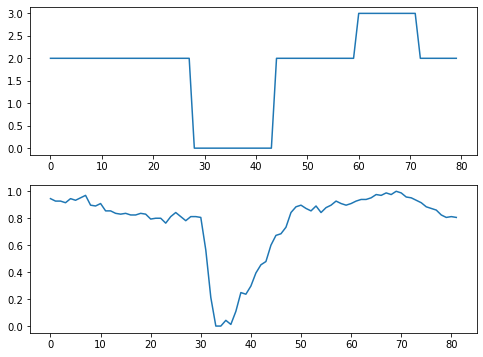

In [5]:
fig, ax = plt.subplots(nrows=2, figsize=(8, 6))
ax[0].plot(np.repeat(x_sax[0], 4, axis=0))
ax[1].plot(x[0])

If we set ``estimate=False``, the results are incorrect unless we standardize the time series.

In [6]:
transform.set_params(estimate=False)
x_sax = transform.fit_transform(x)

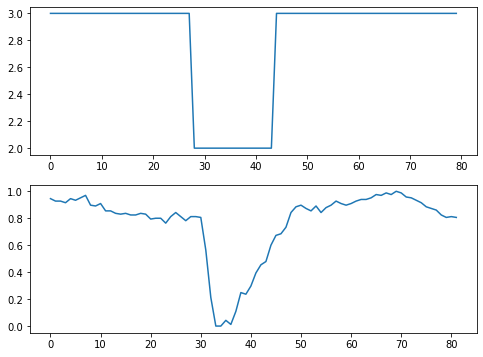

In [7]:
fig, ax = plt.subplots(nrows=2, figsize=(8, 6))
ax[0].plot(np.repeat(x_sax[0], 4, axis=0))
ax[1].plot(x[0])

However, since the time series are min/max normalized, we can safely use the ``binning="uniform"`` without setting ``estimate=True``.

In [8]:
transform.set_params(binning="uniform")
x_sax = transform.fit_transform(x)

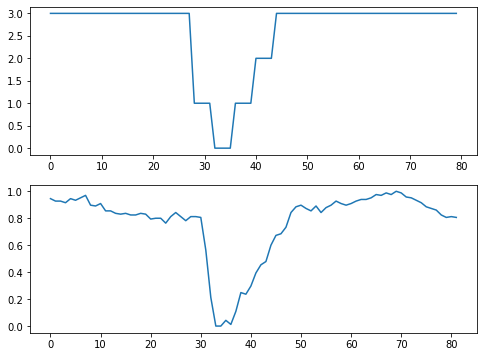

In [9]:
fig, ax = plt.subplots(nrows=2, figsize=(8, 6))
ax[0].plot(np.repeat(x_sax[0], 4, axis=0))
ax[1].plot(x[0])